This dataset was taken from 
https://www.kaggle.com/joniarroba/noshowappointments/downloads/noshowappointments.zip/5
to investigate the factors that lead to a no-show in the patients.

Here, the factors that we will explore will be
- Gender
- Age
- Neighbourhood
- Scholarship
- Types of ailments (Hypertension, Diabetes, Alcoholism, Handicap)
- If SMS is sent

In [10]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
# read in data from sample file
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head() # show the first five rows

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
dataDrop = df.copy()
features_drop = ['PatientId', 'AppointmentID','ScheduledDay','AppointmentDay']
dataDrop = dataDrop.drop(features_drop, axis=1)

These above features are identifier which does not correlate to the patient's turn out.

In [13]:
dataDrop.head(5)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
print(df['Neighbourhood'].value_counts())

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2214
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

Neighbourhood has 81 unique values, hence, we will drop it too.

In [15]:
dataDrop = dataDrop.drop('Neighbourhood', axis=1)

In [16]:
dataDrop['Age'].describe(include='all')

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Binning the age

In [17]:
dataDropScaled = dataDrop.copy()

#Scaling the data columns 
dataDropScaled.loc[df['Age']< 10, 'Age'] = 0
dataDropScaled.loc[(df['Age'] >= 10) & (df['Age'] < 20), 'Age'] = 1
dataDropScaled.loc[(df['Age'] >= 20) & (df['Age'] < 30), 'Age'] = 2
dataDropScaled.loc[(df['Age'] >= 30) & (df['Age'] < 40), 'Age'] = 3
dataDropScaled.loc[(df['Age'] >= 40) & (df['Age'] < 50), 'Age'] = 4
dataDropScaled.loc[(df['Age'] >= 50) & (df['Age'] < 60), 'Age'] = 5
dataDropScaled.loc[(df['Age'] >= 60) & (df['Age'] < 70), 'Age'] = 6
dataDropScaled.loc[(df['Age'] >= 70) & (df['Age'] < 80), 'Age'] = 7
dataDropScaled.loc[(df['Age'] >= 80) & (df['Age'] < 90), 'Age'] = 8
dataDropScaled.loc[(df['Age'] >= 90) & (df['Age'] < 100), 'Age'] = 9
dataDropScaled.loc[df['Age'] >= 100, 'Age'] = 10

Mapping the word values into numerical

In [19]:
dataDropScaledMap = dataDropScaled.copy()

mydict = {
    'F': 0,
    'M': 1,
    'No': 0,
    'Yes': 1
}

for i in [0,8]:
    dataDropScaledMap.iloc[:, i] = dataDropScaledMap.iloc[:, i].map(mydict)

In [21]:
from pandas.plotting import scatter_matrix
corr = dataDropScaledMap.corr()
corr.style.background_gradient(cmap='coolwarm')

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
Gender,1,-0.104285,-0.114296,-0.0557219,-0.0325558,0.106166,0.0228134,-0.0463025,-0.00412199
Age,-0.104285,1,-0.0972615,0.503017,0.291735,0.0953145,0.0761721,0.0119598,-0.0615148
Scholarship,-0.114296,-0.0972615,1,-0.0197303,-0.0248944,0.035022,-0.00858669,0.00119196,0.0291336
Hipertension,-0.0557219,0.503017,-0.0197303,1,0.433085,0.0879701,0.0800828,-0.00626997,-0.0357035
Diabetes,-0.0325558,0.291735,-0.0248944,0.433085,1,0.0184731,0.0575297,-0.0145518,-0.0151812
Alcoholism,0.106166,0.0953145,0.035022,0.0879701,0.0184731,1,0.00464743,-0.0261485,-0.00019685
Handcap,0.0228134,0.0761721,-0.00858669,0.0800828,0.0575297,0.00464743,1,-0.0241618,-0.00607685
SMS_received,-0.0463025,0.0119598,0.00119196,-0.00626997,-0.0145518,-0.0261485,-0.0241618,1,0.126428
No-show,-0.00412199,-0.0615148,0.0291336,-0.0357035,-0.0151812,-0.00019685,-0.00607685,0.126428,1


Here, we can see that hypertension has a strong correlation to age and diabetes, 0.50 and 0.43. Diabetes is also correlated to age with a R value of 0.29.

In [22]:
dataDropScaledMap.isnull().sum()

Gender          0
Age             0
Scholarship     0
Hipertension    0
Diabetes        0
Alcoholism      0
Handcap         0
SMS_received    0
No-show         0
dtype: int64

## Modeling

In [23]:
# import train_test_split
from sklearn.model_selection import train_test_split
target = dataDropScaledMap['No-show'] # this is like the dependent variable: y
x_train, x_test, y_train, y_test = train_test_split(dataDropScaledMap, target, random_state = 42)

In [24]:
features_drop_inXTrainTest = ['No-show']
x_traincopy = x_train.drop(features_drop_inXTrainTest, axis=1)
x_testcopy = x_test.drop(features_drop_inXTrainTest, axis=1)

In [25]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [30]:
def modeltraining(clf):
    scoring = 'accuracy'
    score = cross_val_score(clf, x_traincopy, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
    print(round(np.mean(score)*100, 2))

In [31]:
modeltraining(KNeighborsClassifier(n_neighbors = 13))
modeltraining(DecisionTreeClassifier())
modeltraining(RandomForestClassifier(n_estimators=13))
modeltraining(GaussianNB())
modeltraining(SVC(gamma='scale'))

78.9
79.69
79.65
78.99
79.72


SVC proves to be the best model, but it is the longest to compute. Hence, we pick the decision tree.

In [32]:
dt = DecisionTreeClassifier() 
dt.fit(x_traincopy, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
y_pred = dt.predict(x_testcopy) # let the model predict the test data

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8004849449913144

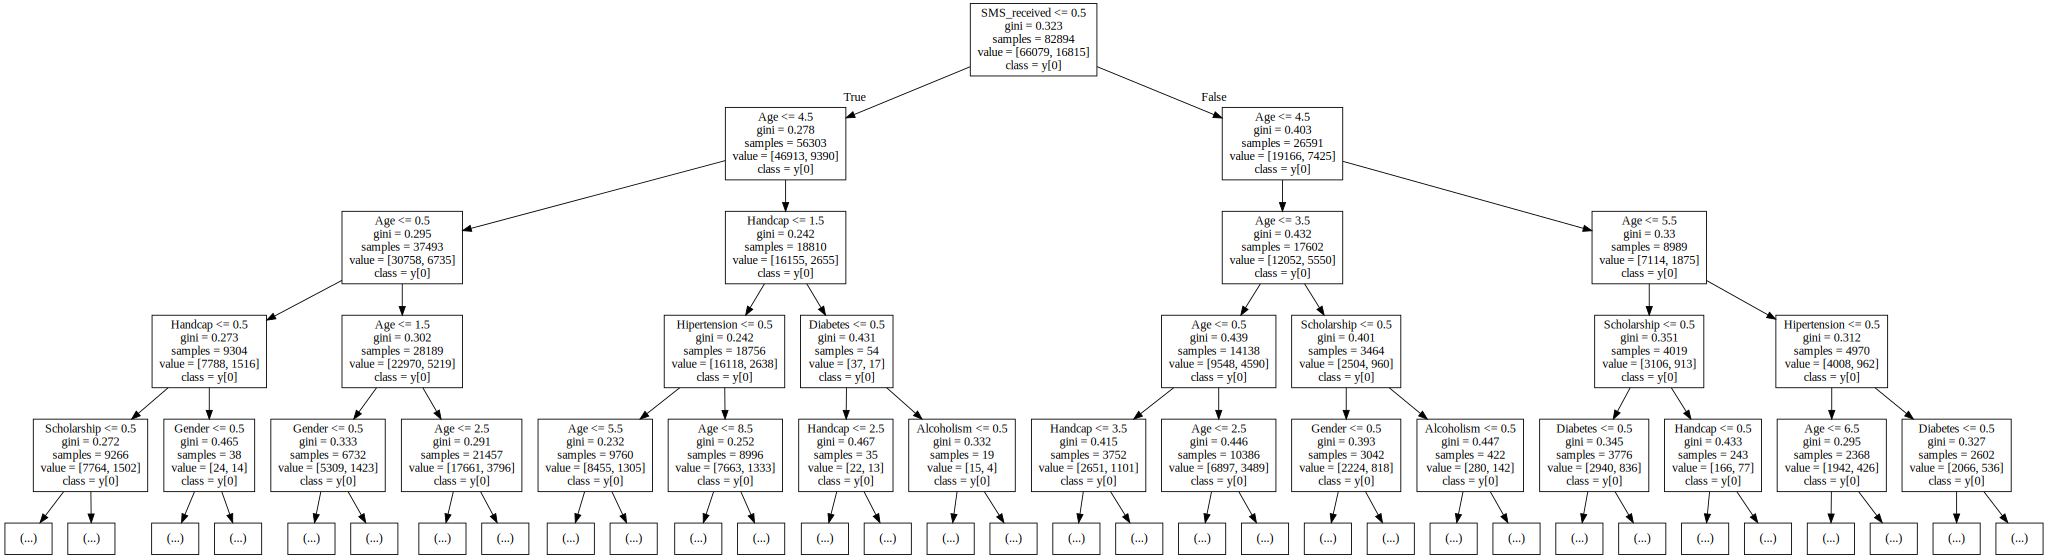

In [38]:
# show the decision tree model
# import graphviz and sklearn.tree first
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_traincopy.columns, max_depth = 4)) # display the tree, with no output file

SMS_Received is the first determinant for a no-show appointment, followed by Age.

Given the following patient
Gender Male - 1
Age 56 - 5
Scholarship No - 0
Hipertension Yes - 1
Diabetes No - 0
Alcoholism No - 0
Handcap No - 0
SMS_received No - 0

In [40]:
dt.predict([[1,5,0,1,0,0,0,0]])

array([0], dtype=int64)

The output is 0 which means that he not show up with a 80% accuracy.